In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

In [3]:
img = "image_task1.jpeg"

### Original Image

In [4]:
original_image = cv2.imread(img)

cv2.imshow('Original Image', original_image)
cv2.imwrite("task1_original_image.jpeg", original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Negative Image

In [5]:
negative_image = 255 - original_image

cv2.imshow('Negative Image', negative_image)
cv2.imwrite("task1_negative_image.jpeg", negative_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Brightness Enhanced (50)

In [13]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
# Adjust the brightness channel (value channel)
hsv_image[:, :, 2] += 50
# Clip the pixel values to ensure they remain in the valid range [0, 255]
hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2], 0, 255)
# Convert the image back to the BGR color space
enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Brightened Image (50)', enhanced_image)
cv2.imwrite("task1_brightened_image(50).jpeg", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# brightness_factor = 50
# brightened_image = cv2.add(original_image, brightness_factor)  

# cv2.imshow('Brightened Image (50)', brightened_image)
# cv2.imwrite("task1_brightened_image(50)2.jpeg", brightened_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Brightness Enhanced (-50)

In [11]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
# Adjust the brightness channel (value channel)
hsv_image[:, :, 2] -= 50
# Clip the pixel values to ensure they remain in the valid range [0, 255]
hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2], 0, 255)
# Convert the image back to the BGR color space
enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Brightened Image (-50)', enhanced_image)
cv2.imwrite("task1_brightened_image(-50).jpeg", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# brightness_factor = -50
# brightened_image = cv2.add(original_image, brightness_factor)  

# cv2.imshow('Brightened Image (-50)', brightened_image)
# cv2.imwrite("task1_brightened_image(-50)2.jpeg", brightened_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Contrast Enhanced (50)

In [19]:
# Load the input image
original_image = cv2.imread("image_task1.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply contrast adjustment
contrast_enhanced_image = cv2.add(original_image, 50)

# Display the result
cv2.imshow('Contrast Enhanced Image (+50)', contrast_enhanced_image)
cv2.imwrite("task1_contrast_enhanced_image(+50).jpeg", contrast_enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Contrast Enhanced (-50)

In [29]:
# Load the input image
original_image = cv2.imread('image_task1.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply contrast adjustment
contrast_enhanced_image = cv2.subtract(original_image, 50)

# Display the result
cv2.imshow('Contrast Enhanced Image (-50)', contrast_enhanced_image)
cv2.imwrite("task1_contrast_enhanced_image(-50).jpeg", contrast_enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Exercise 2

In [30]:
original_image2 = cv2.imread('image_task2.jpeg', cv2.IMREAD_GRAYSCALE)

### Enhance the contrast of the input image using Gamma correction

In [32]:
gamma = 2.5
gamma_corrected_image = np.clip((original_image2 / 255.0) ** (1 / gamma) * 255.0, 0, 255).astype(np.uint8)


cv2.imshow('Contrast Enhanced Gamma Correction', gamma_corrected_image)
cv2.imwrite("task2_contrast_enhanced_gamma_correction.jpeg", gamma_corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Enhance the contrast of the input image using histogram equalization technique

In [38]:
equalized_image = cv2.equalizeHist(original_image2)

cv2.imshow('Contrast Enhanced Histogram Equalization ', equalized_image)
cv2.imwrite("task2_contrast_enhanced_histogram_equalization.jpeg", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

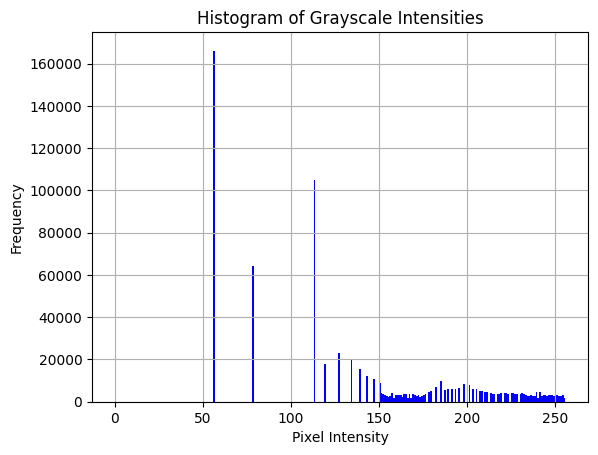

In [40]:
plt.hist(equalized_image.flatten(), bins=256, range=[0,256], color='b')
plt.xlabel('Pixel Intensity', color='black')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Intensities')
plt.grid(True)
plt.show()

# Exercise 3

In [77]:
original_image3 = cv2.imread('image_task3.jpeg')  
# original_image3 = cv2.imread('image_task3.jpeg', cv2.IMREAD_GRAYSCALE)

### RGB to Gray

In [18]:
gray_image = cv2.cvtColor(original_image3, cv2.COLOR_BGR2GRAY)

cv2.imshow('Gray Image', gray_image)
cv2.imwrite("task3_gray_image.jpeg", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Detect connected components

In [15]:

# Apply Gaussian blur and adaptive thresholding
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

# Filter contours based on area
filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > 100]  # Adjust area threshold as needed

# Draw contours on the original image
output_image = original_image3.copy()
for contour in filtered_contours:
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

# Display the output image with contours
cv2.imshow('Output Image', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

3


In [16]:
# Apply Gaussian blur and adaptive thresholding
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

background = (255, 255, 255)
colored_image = original_image3.copy()
colored_image[:, :] = background

# Define colors for components
component_colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # Red, Green, Blue

# Draw contours with different colors
for i, contour in enumerate(contours):
    # Check if contour has no parent (top-level contour)
    if hierarchy[0][i][3] == -1:
        cv2.fillPoly(colored_image, [contour], component_colors[i])

# Display the result
cv2.imshow('Colored Components', colored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

# Load the input image
original_image3 = cv2.imread('image_task33.jpg')
gray_image = cv2.cvtColor(original_image3, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Adaptive thresholding
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Dilate the binary image to fill gaps between components
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)

# Detect connected components
num_labels, labels = cv2.connectedComponents(binary_image)

# Create a color mask for visualization
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # BGR format
colored_mask = np.zeros_like(original_image3)

# Loop through each component label (excluding the background)
for label in range(1, num_labels):
    # Create a binary mask for the current component
    component_mask = np.uint8(labels == label) * 255
    
    # Find contours of the component
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours with the corresponding color
    cv2.drawContours(colored_mask, contours, -1, colors[label - 1], thickness=cv2.FILLED)

    # Display the connected components
    cv2.imshow('Connected Components', colored_mask)
    cv2.imwrite("task3_Connected_Components.jpeg", colored_mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np

# Load the input image
image = cv2.imread('image_task3.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


print(len(contours))
original_image = image.copy()

# Draw each component with a different color
for i, contour in enumerate(contours):
    # Create a mask for the current component
    colored_mask = np.zeros_like(gray)
    # Get the bounding rectangle of the contour
    cv2.drawContours(colored_mask, [contour], -1, 255, thickness=cv2.FILLED)
    image[colored_mask == 0] = (0, 255, 0)
    image[colored_mask == 255] = (255, 255, 255)


gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

colors = [(0, 0, 255), (255, 0, 0)]

# Draw each component on the image with its original color
for i, contour in enumerate(contours[:1] + contours[2:]):

    x, y, w, h = cv2.boundingRect(contour)
    image[y:y+h, x:x+w] = colors[i]


# Display the result
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1
3


### A bar plot to compare the sizes (number of pixels)

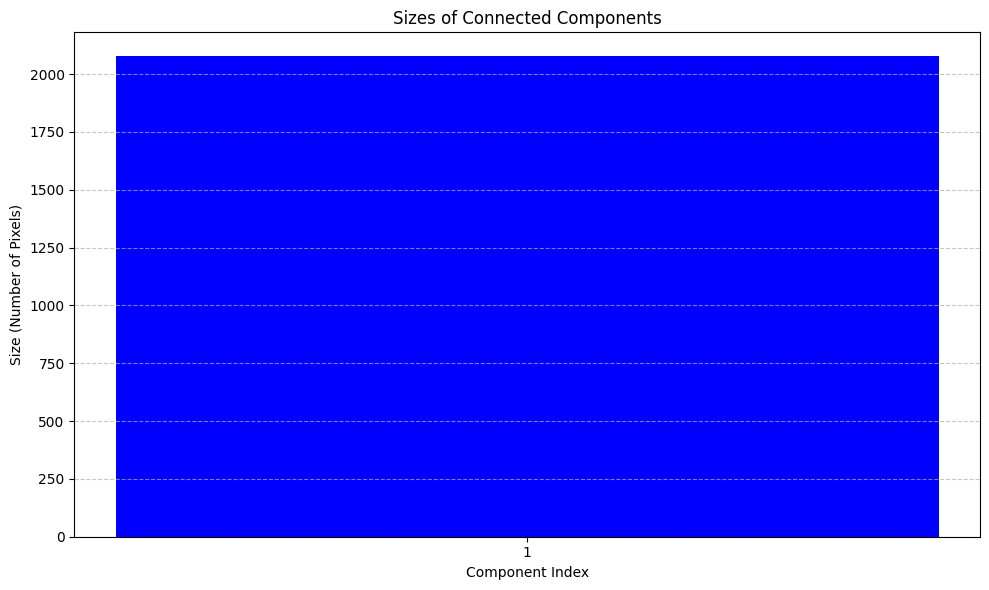

In [22]:
# Store the sizes (number of pixels) of connected components
component_sizes = [cv2.contourArea(contour) for contour in contours]

# Plot the sizes of connected components
plt.figure(figsize=(10, 6))
plt.bar(range(len(component_sizes)), component_sizes, color='blue')
plt.xlabel('Component Index')
plt.ylabel('Size (Number of Pixels)')
plt.title('Sizes of Connected Components')
plt.xticks(range(len(component_sizes)), range(1, len(component_sizes) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

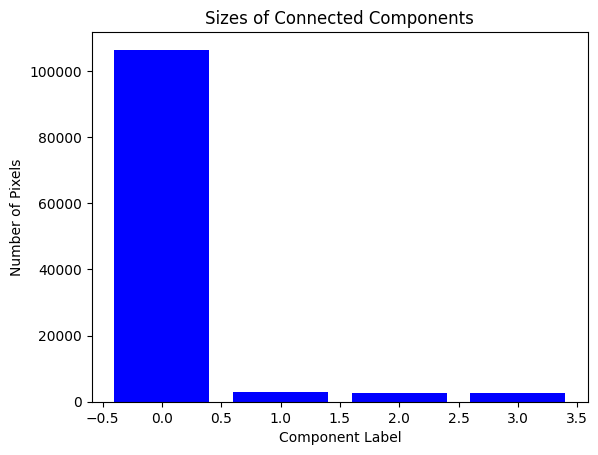

In [20]:
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts, color='b')
plt.xlabel('Component Label')
plt.ylabel('Number of Pixels')
plt.title('Sizes of Connected Components')
plt.show()

### Compute and print the percentage size of each connected component

In [21]:
total_pixels = gray_image.shape[0] * gray_image.shape[1]
for i in range(1, len(counts)):
    percentage_size = (counts[i] / total_pixels) * 100
    print(f'Connected Component {i}: {percentage_size:.2f}%')

Connected Component 1: 2.65%
Connected Component 2: 2.28%
Connected Component 3: 2.18%


In [23]:
# Compute and print the percentage size of each connected component
total_pixels = original_image3.shape[0] * original_image3.shape[1]
for i, contour in enumerate(contours):
    # Compute the area of the current component
    component_area = cv2.contourArea(contour)
    # Compute the percentage size of the current component relative to the total area of the image
    percentage_size = (component_area / total_pixels) * 100
    print(f"Component {i + 1}: {percentage_size:.2f}%")

Component 1: 1.81%
